# Detect texture



In [11]:
import numpy as np
import cv2
import math
from scipy.ndimage.filters import generic_filter

img  = cv2.imread('img.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('edge_s1.jpg', gray)

x = gray.astype('float')
x_filt = generic_filter(x, np.std, size=7)
cv2.imwrite('edge_s2.jpg', x_filt)

x_filt[x_filt < 20] = 0
cv2.imwrite('edge_s3.jpg', x_filt)

maxv = np.max(x_filt)
print(maxv)

x_filt = x_filt*2.5
cv2.imwrite('edge_s4.jpg', x_filt)

97.80697358385369


True

Đối với các bài toán tìm texture ở trên, ban đầu ta chuyển ảnh về dạng grayscale, sau đó dùng hàm generic_filter() để
biến đổi các giá trị trong mảng pixel truyền vào dựa vào size và function - ở đây ta sử dụng function là np.std: hàm tính độ lệch chuẩn. Sau đó với loại bỏ các giá trị trong ảnh đã xử lý có pixel nhỏ hơn 1 giá trị nào đó để giảm các texture không cần thiết.
Nếu các giá trị pixel tương ứng với size đã qua xử lý mà khác nhau nhiều, phân bố rộng hay phương sai ~ độ lệch chuẩn lớn thì sau khi tìm được ảnh 3 ta sẽ nhân nó với 1 lượng tương ứng để scale giá trị pixel lớn  $\rightarrow$ 255 $\rightarrow$ ~ trắng

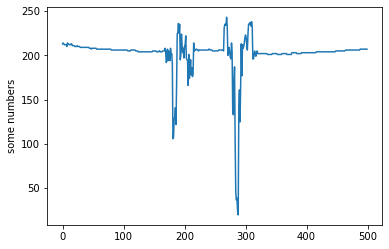

In [21]:
"""
Use matplotlib to represent pixel in one row of original image (gray). Example row 100
"""

import matplotlib.pyplot as plt

plt.plot(gray[100])
plt.ylabel('some numbers')
plt.show()

Ta xét 2 ảnh có texture rõ và không rõ, sau đó biểu diễn trong không gian 3 chiều như sau:

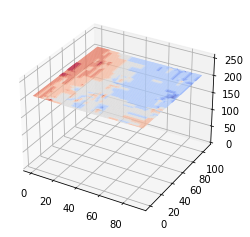

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

img  = cv2.imread('region_textureless.jpg', 0)

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:img.shape[0], 0:img.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, img ,rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
ax.set_zlim([0, 255])

# show it
plt.show()

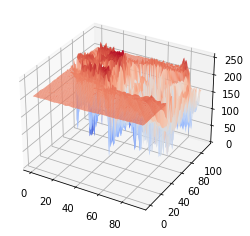

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

img  = cv2.imread('region_texture.jpg', 0)

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:img.shape[0], 0:img.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, img ,rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
ax.set_zlim([0, 255])
# show it
plt.show()

In [ ]:
Ở hình thứ 2 do texture rõ hơn, độ thay đổi giá trị dữ liệu giữa các pixel là đáng kể nên ở trong không gian ba chiều thì
nó sẽ nhô lên ở nhiều vị trí, ngược lại ở hình 1 thì hình biểu diễn tương đối phẳng.